# BANK APP REVIEWS - CBE

In [39]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [40]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [41]:
warnings.filterwarnings("ignore")

In [42]:
# variable
BANK="CBE"

In [43]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

### 📌 Project Overview

#### CBE APP Reviews


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [44]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/CBE_raw_reviews.csv (type=csv)


INFO:data.load_data:Data loaded successfully. Shape: (1000, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,54f070b9-895f-40e8-be18-acb16f8af7fa,Kumsa Mergia,https://play-lh.googleusercontent.com/a-/ALV-U...,Best Mobile Banking app ever,5,0,5.0.4,2025-06-04 16:50:52,NaN,NaN
1,aa72fd94-aca8-48b2-bae2-29ad7633c7fb,Abuki Se,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,5.1.0,2025-06-04 16:00:15,NaN,NaN
2,9af95d2a-e42c-45ff-a4c9-5c38765df4a4,Hermela Yoseph,https://play-lh.googleusercontent.com/a/ACg8oc...,it was good app but it have some issues like i...,2,0,5.1.0,2025-06-04 15:56:02,NaN,NaN
3,067d3e52-3586-4e02-b088-0411f25d34fb,Mame Abdu,https://play-lh.googleusercontent.com/a/ACg8oc...,dedeb,5,0,NaN,2025-06-04 15:04:02,NaN,NaN
4,88a64315-9de3-4a35-ac27-5ff37c2833b6,Degu Emiru,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,5.1.0,2025-06-04 14:59:40,NaN,NaN


### Dataset Overview

In [45]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
290,325bdd8a-e83c-4522-986c-c30c73e3d90a,abebaw alamirew,https://play-lh.googleusercontent.com/a/ACg8oc...,easy and reliable,2,1,5.1.0,2025-04-08 13:16:22,NaN,NaN
498,2454d502-1137-4853-a1db-e15b4c4e6809,Hayalnew Yilma,https://play-lh.googleusercontent.com/a-/ALV-U...,it's very useful,5,0,5.0.9,2025-03-23 12:25:24,NaN,NaN
757,a53422c5-e71a-492d-9a6a-af07df5e33fd,YAA RABBI,https://play-lh.googleusercontent.com/a/ACg8oc...,Great,5,1,5.0.9,2025-02-14 00:18:46,NaN,NaN
237,66b05081-b1eb-4744-90a9-33106e7017ec,hailu ayalew,https://play-lh.googleusercontent.com/a/ACg8oc...,i can't take screenshot,1,0,NaN,2025-04-18 11:59:02,NaN,NaN
247,2a76a4cd-b2c9-4c07-b339-dd5422a6bf27,Megabi Adane,https://play-lh.googleusercontent.com/a/ACg8oc...,very nice app ever!!!,5,0,NaN,2025-04-16 18:40:04,NaN,NaN
766,acf4f134-9b10-4ec3-a1a0-0b964de2d335,hailu tsegaye,https://play-lh.googleusercontent.com/a/ACg8oc...,nice thanks,5,1,5.0.9,2025-02-13 00:11:02,NaN,NaN
545,cbae8db5-455f-45a9-a45b-a41eafbd59d0,AMG,https://play-lh.googleusercontent.com/a-/ALV-U...,Taking away the screenshot of the receipt is j...,1,37,5.1.0,2025-03-20 06:58:01,NaN,NaN
77,02df386f-21b3-47c3-921f-4bf17ce136f8,Akalewold Girma,https://play-lh.googleusercontent.com/a/ACg8oc...,Awosome!!!,5,0,NaN,2025-05-22 16:14:31,NaN,NaN
129,6f106ca0-c98c-4282-a880-eafdb3834cf6,Nguss Abadi,https://play-lh.googleusercontent.com/a/ACg8oc...,nice,5,0,5.1.0,2025-05-14 16:20:48,NaN,NaN
527,d45d0cce-d1e3-4ab2-bff1-5dc9f39ffc0f,Zuleyka Nurezeman,https://play-lh.googleusercontent.com/a/ACg8oc...,Wow its my in,5,0,NaN,2025-03-21 15:22:16,NaN,NaN


In [46]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
995,e94bf2e4-61c5-4557-8005-8a69d98d57c3,Keyredin Love,https://play-lh.googleusercontent.com/a-/ALV-U...,very nice,5,1,5.0.8,2025-01-23 14:43:32,NaN,NaN
996,a3bf09ab-ac37-4e8c-ae11-b3de96fbeeff,Abdi Melaku,https://play-lh.googleusercontent.com/a-/ALV-U...,Good App,5,1,5.0.8,2025-01-23 10:10:17,NaN,NaN
997,79ad3d28-7c26-42dd-80ae-8ebe18aedb84,Romario Maldini,https://play-lh.googleusercontent.com/a-/ALV-U...,very inconvenience to use. unreliable and need...,1,1,5.0.8,2025-01-23 02:08:23,NaN,NaN
998,8e1c079d-d88e-4f8e-87c3-f7103fc75362,Mesfin Abebe,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,1,5.0.8,2025-01-22 19:52:13,NaN,NaN
999,ba4d07e6-fa92-4580-8729-49ac6e04eb14,yosef zekariyas,https://play-lh.googleusercontent.com/a-/ALV-U...,Good I like it .,5,1,5.0.8,2025-01-22 17:40:03,NaN,NaN


In [47]:
#shape of the dataset
df.shape

(1000, 10)

In [48]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [49]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1000.0,4.150,1.430925,1.0,4.0,5.0,5.0,5.0
thumbsUpCount,1000.0,6.397,57.066242,0.0,0.0,0.0,1.0,936.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,1000,1000,54f070b9-895f-40e8-be18-acb16f8af7fa,1
userName,1000,997,Nahom Solomon,2
userImage,1000,1000,https://play-lh.googleusercontent.com/a-/ALV-U...,1
content,1000,740,Good,52
reviewCreatedVersion,798,9,5.1.0,406
at,1000,1000,2025-06-04 16:50:52,1


In [51]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              1000 non-null   object 
 1   userName              1000 non-null   object 
 2   userImage             1000 non-null   object 
 3   content               1000 non-null   object 
 4   score                 1000 non-null   int64  
 5   thumbsUpCount         1000 non-null   int64  
 6   reviewCreatedVersion  798 non-null    object 
 7   at                    1000 non-null   object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [52]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                1000
userImage               1000
at                      1000
userName                 997
content                  740
thumbsUpCount             41
reviewCreatedVersion       9
score                      5
replyContent               0
repliedAt                  0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [53]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [54]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,1000,100.00%
repliedAt,1000,100.00%
reviewCreatedVersion,202,20.20%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [55]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,1000,100.00%
repliedAt,1000,100.00%
reviewCreatedVersion,202,20.20%


### Duplicates

In [56]:
#count duplicates
dq.count_duplicates()

0

In [57]:
#look at the duplicates
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


### Invalid Values

In [58]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [59]:
#saving the original dataset for later use
df_original=df.copy()

In [60]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 0 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
851,f7720594-9983-486a-83e5-d8a01e158cca,Eyasu Milkias,https://play-lh.googleusercontent.com/a/ACg8oc...,So nice,5,1,5.0.8,2025-02-03 23:51:19,NaN,NaN
807,eab396b5-fbad-4855-a566-6d5cac828e87,ABDATA MOHAMMED,https://play-lh.googleusercontent.com/a-/ALV-U...,Thank you,5,1,5.0.9,2025-02-08 00:44:17,NaN,NaN
856,450ce12c-bed9-4b5d-8339-ead9eb35562e,Akuien Atem,https://play-lh.googleusercontent.com/a-/ALV-U...,"I have seen lots of great updates right here, ...",4,27,5.0.9,2025-02-03 16:35:53,NaN,NaN
732,99d1371c-f91a-459e-a37e-4326b3845735,Melaku Woldekidan,https://play-lh.googleusercontent.com/a-/ALV-U...,Good app,5,2,5.0.9,2025-02-17 18:45:25,NaN,NaN
234,ad5ea4f1-47f8-4ae1-928c-6fece7daaed1,Jonathan Getachew,https://play-lh.googleusercontent.com/a-/ALV-U...,why removing screenshot feature why?,1,0,5.1.0,2025-04-18 18:47:21,NaN,NaN


In [61]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [62]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
628,8e315f93-c03e-4688-8010-993e7fa9618a,Yomiyou Gebissa,https://play-lh.googleusercontent.com/a-/ALV-U...,Best service,5,0,5.0.9,2025-03-04 05:02:57,NaN,NaN
443,d3afe77f-b964-469e-a25a-9dc549fb3cfa,Bakri Abrahim,https://play-lh.googleusercontent.com/a-/ALV-U...,halan garidhaa cbe,5,0,NaN,2025-03-30 08:33:53,NaN,NaN
401,d6af9aa1-6bc2-4e40-b82e-7ab2abe15644,Zerihun Sisay,https://play-lh.googleusercontent.com/a/ACg8oc...,"very good, but sometimes....",4,0,5.1.0,2025-03-31 14:02:22,NaN,NaN
800,1a2bf7cd-6b59-4e10-afcd-a47228c7589d,Raji Fikadu Aschalew,https://play-lh.googleusercontent.com/a/ACg8oc...,Good app,5,1,5.0.9,2025-02-08 17:15:20,NaN,NaN
640,01286681-19a9-4be2-83a9-cb428efe78fa,Yonas Tadesse,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,4,1,5.0.9,2025-03-02 11:04:46,NaN,NaN


In [63]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [64]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [65]:
dq.find_invalid_values()

{}

In [66]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [67]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=good "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=pl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=nice "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=sl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=i+love+it+love+love "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=ca&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=excellent "HTTP/2 200 OK"
INFO:httpx:HTTP Request:

In [68]:
df.shape

(1000, 5)

### Inconsistencies and Inaccuracies

In [69]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [70]:
df=dq.convert_columns_to_datetime()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       1000 non-null   object
 1   content        1000 non-null   object
 2   score          1000 non-null   int64 
 3   thumbsUpCount  1000 non-null   int64 
 4   at             1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [72]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [73]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [74]:
df["bank"] = BANK  # add bank name column

In [75]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank
379,Excellent application match,5,2025-03-31 20:18:19,Fbarre researcher,0,CBE
691,Constantly crashing after new update,1,2025-02-24 14:11:20,Douglas H,1,CBE
897,Very Good,5,2025-01-30 17:46:29,Abdurezak Negashe,1,CBE
506,Good,5,2025-03-22 22:43:58,Ashu Kebede,0,CBE
265,Nice App,5,2025-04-12 22:44:46,Nigisti Gkirstos,0,CBE
818,አፕሊኬሽኑ ብዙ ግዜ ወደኋላ ይመልሳል,3,2025-02-07 10:35:59,Kaleab Amehayes,0,CBE
836,Very fast and easy to use,5,2025-02-05 00:03:20,Abrham Shewandagn,1,CBE
779,CBE,1,2025-02-11 04:18:08,Mathos Miju,0,CBE
556,Good,5,2025-03-19 03:50:56,Maxamed xasan,0,CBE
191,it's the best app i,5,2025-05-02 15:03:06,Beza Sibhatu,0,CBE


## 6. Analyze & Visualize

In [76]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


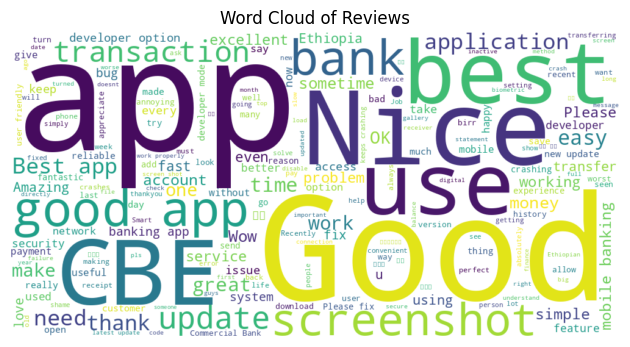

In [77]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


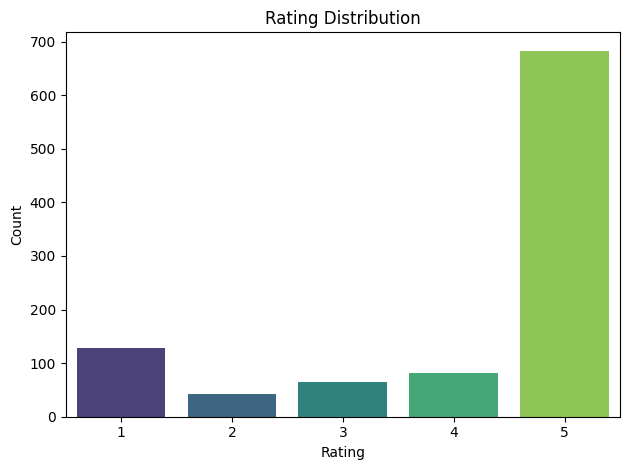

In [78]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


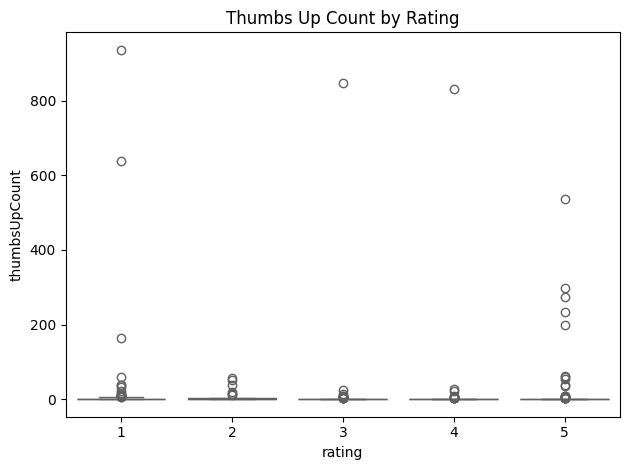

In [79]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


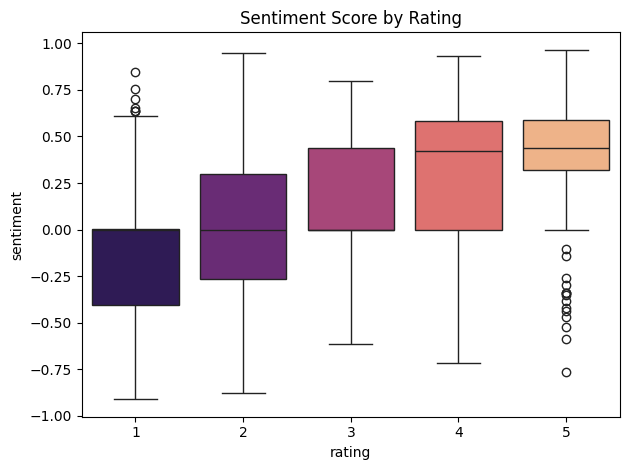

In [80]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

### Export Cleaned Data

In [81]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

In [82]:
df.sample(15)

,review,rating,date,userName,thumbsUpCount,bank
804,It's ok,5,2025-02-08 12:34:08,A Google user,1,CBE
626,it's not working good,5,2025-03-04 12:34:18,Roba Wako,0,CBE
668,I have been using the App since it is first re...,3,2025-02-27 18:06:41,Candy Zack (ልዩ),0,CBE
753,Very good happy,3,2025-02-14 17:25:14,Abdilah Hassen,0,CBE
400,It is Best Bank,5,2025-03-31 14:14:10,Suleyman,0,CBE
480,very nice and convenient app,5,2025-03-24 20:13:07,Nimona Genjosa,0,CBE
936,I like it more the app cbe thank you !,5,2025-01-27 12:10:49,Amanuel Kelelom,1,CBE
187,Network Errorrrrrrr,2,2025-05-02 16:52:00,Nahom Solomon,0,CBE
558,It was nice but now it dose not opened the tra...,5,2025-03-18 20:23:49,Tigistu Kinfe,0,CBE
791,This app is very interesting and simple to use.,5,2025-02-09 10:23:07,Ahmed Salim,2,CBE
